In [ ]:
https://github.com/marsmarcin/Arbitrary_Quadrilateral_Computing_IOU/blob/master/cpt_iou_v3.py


In [2]:
!wget https://career.gpo.vn/uploads/images/truong-hoc/logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg

--2022-10-06 06:38:51--  https://career.gpo.vn/uploads/images/truong-hoc/logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg
Resolving career.gpo.vn (career.gpo.vn)... 103.101.160.140
Connecting to career.gpo.vn (career.gpo.vn)|103.101.160.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12464 (12K) [image/jpeg]
Saving to: ‘logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg’

logo-hoc-vien-cong- 100%[===================>]  12.17K  --.-KB/s    in 0s      

2022-10-06 06:38:52 (162 MB/s) - ‘logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg’ saved [12464/12464]



In [3]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # for image display

(300, 500, 3)


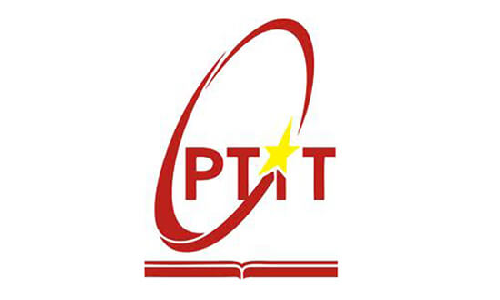

In [6]:
path = '/content/logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg'
img = cv2.imread(path, 1)
img = cv2.resize(img, (500, 300),interpolation = cv2.INTER_NEAREST)
print(img.shape)
cv2_imshow(img)
cv2.destroyAllWindows()


In [9]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import torch
# import torchvision
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw
import xml.etree.ElementTree as ET




In [43]:
import numpy as np 
import shapely
from shapely.geometry import Polygon,MultiPoint  #đa giác
 
line1=[1,1,100,6,106,150,30,230]   #Biểu diễn mảng 1D về tọa độ của bốn điểm của một tứ giác，[x,y,x,y....]
a=np.array(line1).reshape(4, 2)   #Biểu diễn tọa độ hai chiều tứ giác
poly1 = Polygon(a).convex_hull  #Đối tượng hình tứ giác python sẽ tự động tính toán bốn điểm. Bốn điểm cuối cùng theo thứ tự: phía trên bên trái, phía dưới bên trái, phía dưới bên phải, phía trên bên phải, phía trên bên trái
print(a)  #Bạn có thể in nó ra để xem nó có giống như thế này không
 
line2=[60,60,200,6,400,300,30,290]
b=np.array(line2).reshape(4, 2)
poly2 = Polygon(b).convex_hull
print(b)
 
union_poly = np.concatenate((a,b))   #合并两个Hợp nhất hai tọa độ hộp để trở thành 8 * 2
#print(union_poly)
print(MultiPoint(union_poly).convex_hull)      #Chứa điểm đa giác nhỏ nhất trong hai tứ giác
if not poly1.intersects(poly2): 
    iou = 0
else:
    try:
        inter_area = poly1.intersection(poly2).area   #khu vực giao nhau
        print(inter_area)
        #union_area = poly1.area + poly2.area - inter_area
        union_area = MultiPoint(union_poly).convex_hull.area
        print(union_area)
        if union_area == 0:
            iou= 0
        #iou = float(inter_area) / (union_area-inter_area)  #错了
        iou=float(inter_area) / union_area
        # iou=float(inter_area) /(poly1.area+poly2.area-inter_area)
        # Có hai phương pháp tính IOU được đưa ra trong mã nguồn. Phép tính đầu tiên là: phần giao / diện tích của đa giác nhỏ nhất chứa hai tứ giác
        # Thứ hai: giao điểm / liên hợp (phương pháp tính IOU hình hộp chữ nhật phổ biến
    except shapely.geos.TopologicalError:
        print('shapely.geos.TopologicalError occured, iou set to 0')
        iou = 0
 
print(a)
 
print(iou)

[[  1   1]
 [100   6]
 [106 150]
 [ 30 230]]
[[ 60  60]
 [200   6]
 [400 300]
 [ 30 290]]
POLYGON ((1 1, 30 290, 400 300, 200 6, 1 1))
6872.215324945341
82073.0
[[  1   1]
 [100   6]
 [106 150]
 [ 30 230]]
0.08373296120460251


In [44]:
sample_image = Image.open("/content/logo-hoc-vien-cong-nghe-buu-chinh-vien-thong-1-.jpg")
sample_image_annotated=sample_image
draw = ImageDraw.Draw(sample_image_annotated)

s1=[[  1 ,  1],
 [100 ,  6],
 [106, 150],
 [ 30 ,230]]
s2=[[ 60 , 60],
 [200  , 6],
 [400, 300],
 [ 30, 290]]

s1=tuple(tuple (i) for i in s1)
draw.polygon(s1,  outline ="blue")


s2=tuple(tuple (i) for i in s2)
draw.polygon(s2,  outline ="red")

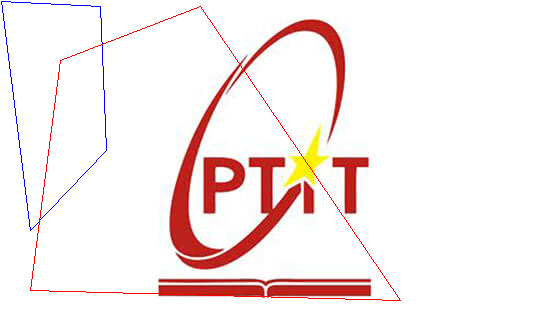

In [45]:
sample_image_annotated